# 图片生成(Image Generation)
ERNIE Bot SDK提供具备文生图能力的**ernie-vilg-v2**大模型。

我们推荐两个撰写文生图提示词的文档，大家可以组合使用，创作出更加精美的图片。

* [AI作画-基础版使用指南](https://ai.baidu.com/ai-doc/NLP/qlakgh129)
* [AI作画-高级版使用指南](https://ai.baidu.com/ai-doc/NLP/4libyluzs)

大家也可登陆[文心一格](https://yige.baidu.com/)平台，体验更多AI艺术与创意辅助的能力。

## 1. API文档以及介绍
此文本仅介绍简单参数，详情请参考[图片生成API文档](../../docs/api_reference/image.md)。

**Python接口**

```python
erniebot.Image.create(**kwargs: Any) -> EBResponse:
```

**输入参数**

调用Image接口前，需要注意**api_type**参数与其他两个基础功能不同。

```python
ernie.api_type = 'yinian'
```
<br>
详细参数如下：

| 参数名 | 类型 | 必填 | 描述 |
| :----- | :----- | :----- | :----- |
| model | str  | 是 | 模型名称。当前支持`'ernie-vilg-v2'`。|
| version | str | 否 | 模型版本。支持`'v1'`、`'v2'`，分别对应模型的v1和v2版本，默认为`'v2'`。v2为最新模型，比v1在准确度、精细度上有比较明显的提升，且v2支持更多尺寸。 |
| prompt | str | 是 | 描述图像内容、风格的文本。仅支持中文、日常标点符号，不支持英文、特殊符号，限制200字。 |
| width | int | 是 | 图片宽度。v1模型支持的图像尺寸有：1024x1024、1280x720、720x1280、2048x2048、2560x1440、1440x2560，v2模型支持的图像尺寸有：512x512、640x360、360x640、1024x1024、1280x720、720x1280、2048x2048、2560x1440、1440x2560。 |
| height | int | 是 | 图片高度。v1模型支持的图像尺寸有：1024x1024、1280x720、720x1280、2048x2048、2560x1440、1440x2560，v2模型支持的图像尺寸有：512x512、640x360、360x640、1024x1024、1280x720、720x1280、2048x2048、2560x1440、1440x2560。 |
| image_num | int | 否 | 生成图片数量。默认一张，支持生成1-8张。 |

## 2. 使用示例


该模型具备丰富的风格与强大的中文理解能力，支持生成多种尺寸的图片。

使用前，请参考[认证鉴权文档](../../docs/authentication.md)申请智能创作平台的API key与secret key用于服务调用鉴权。

先需在智能创作页面中[开通AI绘画服务](https://console.bce.baidu.com/ai/#/ai/intelligentwriting/overview/index),激活AI绘画-高级功能后，将AK，以及SK设置好之后即可调用。

In [39]:
import erniebot,os
from IPython.display import Image

# 注意需api_type与Chat Completion和Embedding不同
erniebot.api_type = 'yinian'
erniebot.access_token = None
erniebot.ak = '<YOUR_EB_AK>'
erniebot.sk = '<YOUR_EB_SK>'

response = erniebot.Image.create(
    model='ernie-vilg-v2',
    prompt="一座梦幻的海滨城市",
    width=512,
    height=512
)

Image(url=response.get_result()[0])

也可以先使用文心大模型帮助您生成一个prompt之后，再放入一帆获得更高质量的图片

In [40]:
erniebot.api_type = 'aistudio'
erniebot.access_token = "<EB_ACCESS_TOKEN>"

PROMPT = "请你帮我把以下输入改为一条绘画指令，要求包含画面主体，细节词，风格词，如果输入中没有提及，则自己想象，输出只需要绘画指令。\nInput:{INPUT}\nOutput:"
prompt = erniebot.ChatCompletion.create(model='ernie-bot-4', messages= [{'role': 'user', 'content': PROMPT.format(INPUT = "一座梦幻风格的海滨城市")}]).get_result()
print(prompt)
erniebot.access_token = None
erniebot.api_type = 'yinian'
response = erniebot.Image.create(
    model='ernie-vilg-v2',
    prompt=prompt,
    width=512,
    height=512
)

Image(url=response.get_result()[0])

绘画指令：画一座梦幻风格的海滨城市，主体是高楼大厦和广阔的海洋，细节包括海浪、沙滩、海鸥和色彩斑斓的灯光，呈现出梦幻般的氛围。


如返回多张图片，可用网格展示

绘画指令：画一个可爱的皮卡丘头像，注重细节，展现出它明亮的眼睛和尖尖的耳朵，风格为卡通风格。


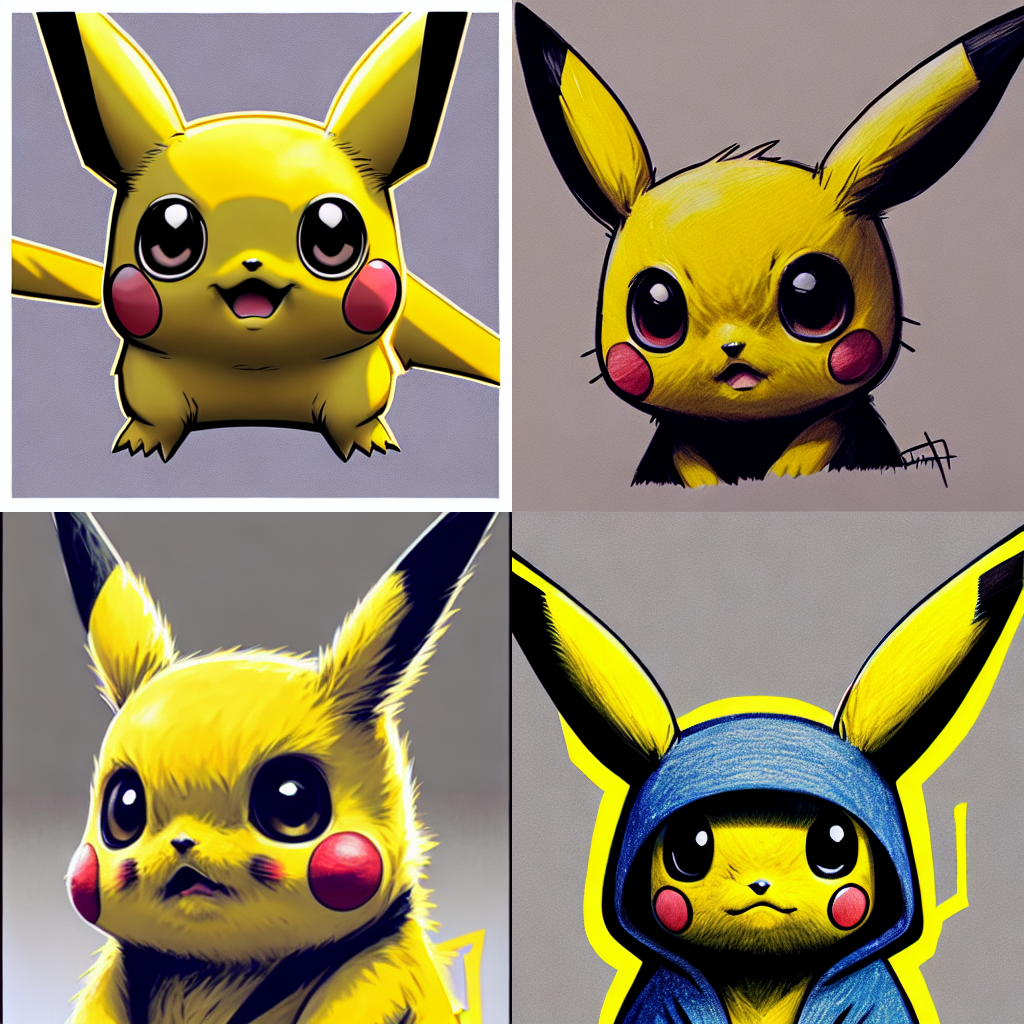

In [34]:
import math
import requests

def grid_pic(image):
    width,height = image[0].size
    nums = len(image)
    rows,cols = int(math.ceil(nums/int(nums**0.5))),int(nums**0.5)
    new_width,new_height = rows*width, cols*height
    new_Image = Image.new('RGB',(new_width,new_height))

    for i in range(nums):
        new_Image.paste(image[i],box = (i%rows*width,i//rows*height))
    
    return new_Image

erniebot.api_type = 'aistudio'
erniebot.access_token = "<EB_ACCESS_TOKEN>"
PROMPT = "请你帮我把以下输入改为一条绘画指令，要求包含画面主体，细节词，风格词，如果输入中没有提及，则自己想象，输出只需要绘画指令。\nInput:{INPUT}\nOutput:"
prompt = erniebot.ChatCompletion.create(model='ernie-bot-4', messages= [{'role': 'user', 'content': PROMPT.format(INPUT = "皮卡丘头像")}]).get_result()
print(prompt)
erniebot.access_token = None
erniebot.api_type = 'yinian'
response = erniebot.Image.create(
    model='ernie-vilg-v2',
    prompt=prompt,
    width=512,
    height=512,
    image_num = 4
)

imgs = []
for url in response.get_result():
    imgs.append(Image.open(requests.get(url,stream=True).raw))
grid_pic(imgs)